## 1. Deep Learning Problem: Binary  Classification
### Ex 1: Predict survival on the Titanic

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option


# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#deep learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [98]:
df = pd.read_csv('titanic.csv')
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [101]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,Q
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
889,1,1,0,26.0,0,0,30.0000,C


In [102]:
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
889,1,1,0,26.0,0,0,30.0000,1


In [103]:
df.groupby('Survived').size()

Survived
0    424
1    288
dtype: int64

In [104]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]

In [105]:
df.shape

(712, 8)

#### Prepare Your Data For Machine Learning 

After completing this lesson you will know how to: 
1. Rescale data.
2. Standardize data. 

from sklearn.preprocessing import StandardScaler <br/>
X = array[:,0:8] <br/>
Y = array[:,8] <br/>
scaler = StandardScaler().fit(X) <br/>
rescaledX = scaler.transform(X) <br/>
rescaledX <br/>

3. Normalize data. 

from sklearn.preprocessing import Normalizer <br/>
X = array[:,0:8] <br/>
Y = array[:,8] <br/>
scaler = Normalizer().fit(X) <br/>
rescaledX = scaler.transform(X) <br/>
rescaledX <br/>

4. Binarize data. 

X = array[:,0:8] <br/>
Y = array[:,8] <br/>
scaler = Binarizer(threshold=0.0).fit(X) <br/>
rescaledX = scaler.transform(X) <br/>
rescaledX <br/>


In [106]:
# Option: Try with normalization inputs
from sklearn.preprocessing import MinMaxScaler
print(X)
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
X = rescaledX
X

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
885       3    1  39.0      0      5  29.1250         2
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[712 rows x 7 columns]


array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 1.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.5       ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [0.        , 1.        , 0.23347575, ..., 0.        , 0.0585561 ,
        0.        ],
       [0.        , 0.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.5       ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.01512699,
        1.        ]])

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)


model = LogisticRegression(solver='liblinear') 
#model = LinearDiscriminantAnalysis()
#model = KNeighborsClassifier()
#model = GaussianNB()
#model = DecisionTreeClassifier()
#model = SVC()
#model = RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test) 
print("Accuracy: %.3f%%" % (result*100.0))

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

Accuracy: 78.322%
[[70 10]
 [21 42]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        80
           1       0.81      0.67      0.73        63

    accuracy                           0.78       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143



In [108]:
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
#16,8,1
model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_53 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 9         
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.4301 - val_loss: 0.6577 - val_accuracy: 0.5638
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.6557 - val_loss: 0.5918 - val_accuracy: 0.7500
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7843 - val_loss: 0.5293 - val_accuracy: 0.7553
Epoch 4/50
48/48 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7995 - val_loss: 0.4984 - val_accuracy: 0.7660
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8480 - val_loss: 0.4658 - val_accuracy: 0.7819
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8197 - val_loss: 0.4755 - val_accuracy: 0.7713
Epoch 7/50
48/48 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8266 - val_loss: 0.4782 - val_accuracy: 0.7660
Epoch 8/50
48/48 [==

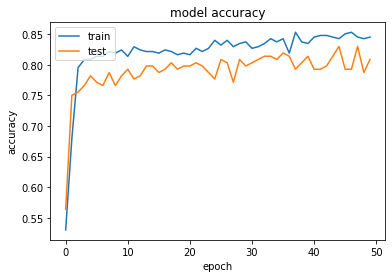

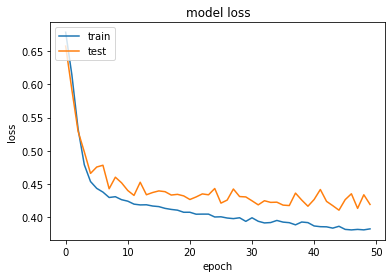

In [109]:
#3. with validation loss --> history graph  (Learning Curves to Diagnose Machine Learning Model Performance slide)
history = model.fit(X_train, Y_train, epochs=50, batch_size=8, validation_split=0.33)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
# evaluate the keras model
# Scalar test loss (if the model has a single output and no metrics) 
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8042
Accuracy: 80.42


In [111]:
# make probability predictions with the model
predictions = model.predict(X_test)
#print(predictions)

# round predictions
rounded = [round(x[0]) for x in predictions]
#print(rounded)

In [112]:
# make class predictions with the model
predictions = model.predict_classes(X_test)
predictions

/Users/Apple/anaconda3/envs/study/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, predictions)
matrix = confusion_matrix(Y_test, predictions)
report = classification_report(Y_test, predictions)

print(acc)
print(matrix)
print(report)

0.8041958041958042
[[75  5]
 [23 40]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.84        80
           1       0.89      0.63      0.74        63

    accuracy                           0.80       143
   macro avg       0.83      0.79      0.79       143
weighted avg       0.82      0.80      0.80       143

